In [1]:
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


ds = pd.read_csv('Publicacions Facebook Thailandia.csv', sep=',')
df = pd.DataFrame(ds)
df

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,1050855161656896_1061863470556065,photo,9/24/2016 2:58,89,0,0,89,0,0,0,0,0,NaN,NaN,NaN,NaN
7046,1050855161656896_1061334757275603,photo,9/23/2016 11:19,16,0,0,14,1,0,1,0,0,NaN,NaN,NaN,NaN
7047,1050855161656896_1060126464063099,photo,9/21/2016 23:03,2,0,0,1,1,0,0,0,0,NaN,NaN,NaN,NaN
7048,1050855161656896_1058663487542730,photo,9/20/2016 0:43,351,12,22,349,2,0,0,0,0,NaN,NaN,NaN,NaN


### Descripción del DataSet

Corresponde a 7050 publicaciones en la red social Facebook.

+ status_id: Id de la publicación.
+ status_type: Tipo de publicación: link, video, status y foto.
+ status_published: Fecha y hora de la publicación.
+ num_reactions: Número de reacciones a la publicación 
+ num_comments: Número de comentarios a la publicación
+ num_shares: Número de veces que se compartió la publicación
+ num_likes: Número de Me gusta ❤️
+ num_loves: Número de Me encanta 😍
+ num_wows: Número de Me sorprende😱
+ num_hahas: Número de Me divierte 🤣
+ num_sads: Número de Me importa🤗
+ num_angrys: Número de Me enoja😡


In [2]:
df.columns

Index(['status_id', 'status_type', 'status_published', 'num_reactions',
       'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows',
       'num_hahas', 'num_sads', 'num_angrys', 'Column1', 'Column2', 'Column3',
       'Column4'],
      dtype='object')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

In [4]:
#Elimino la columna 'status_published'
df.drop(columns=['status_published'], axis=1, inplace = True) 
df.head()

,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [5]:
df.shape

(7050, 15)

In [6]:
df.isnull().sum()

status_id           0
status_type         0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
Column1          7050
Column2          7050
Column3          7050
Column4          7050
dtype: int64

In [7]:
df.isna().sum()

status_id           0
status_type         0
num_reactions       0
num_comments        0
num_shares          0
num_likes           0
num_loves           0
num_wows            0
num_hahas           0
num_sads            0
num_angrys          0
Column1          7050
Column2          7050
Column3          7050
Column4          7050
dtype: int64

Se detectaron cuatro columnas sin información ya que el dataset cuenta con 7050 filas y en las cuatro columnas contienen 7050 nan/null. Procedemos a borrar esas columnas. 


In [8]:
df.drop(columns=['Column1', 'Column2', 'Column3', 'Column4'], axis=1, inplace = True) 
df.head()

,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,213,0,0,204,9,0,0,0,0


In [9]:
df.nunique()

status_id        6997
status_type         4
num_reactions    1067
num_comments      993
num_shares        501
num_likes        1044
num_loves         229
num_wows           65
num_hahas          42
num_sads           24
num_angrys         14
dtype: int64

Se detecta que en la columna Status_id que identifica cada operación hay 6997 registros únicos del total de 7050 por lo que significa que existen registros duplicados. 

In [10]:
df[df.duplicated()].count()

status_id        53
status_type      53
num_reactions    53
num_comments     53
num_shares       53
num_likes        53
num_loves        53
num_wows         53
num_hahas        53
num_sads         53
num_angrys       53
dtype: int64

In [11]:
df= df.drop_duplicates()
df.head()

,status_id,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,213,0,0,204,9,0,0,0,0


In [12]:
#Comprobamos que se han eliminado los registros duplicados.
df[df.duplicated()].count()

status_id        0
status_type      0
num_reactions    0
num_comments     0
num_shares       0
num_likes        0
num_loves        0
num_wows         0
num_hahas        0
num_sads         0
num_angrys       0
dtype: int64

In [13]:
df.shape

(6997, 11)

In [14]:
#Se elimina la columna Status:_id ya que no la utilizaremos.
df.drop(columns=['status_id'], axis=1, inplace = True) 
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_reactions,6997.0,224.951979,452.930082,0.0,17.0,58.0,216.0,4710.0
num_comments,6997.0,225.613977,892.863091,0.0,0.0,4.0,22.0,20990.0
num_shares,6997.0,40.269973,132.064065,0.0,0.0,0.0,4.0,3424.0
num_likes,6997.0,209.899814,439.595761,0.0,17.0,57.0,182.0,4710.0
num_loves,6997.0,12.755181,40.112024,0.0,0.0,0.0,3.0,657.0
num_wows,6997.0,1.253251,8.726772,0.0,0.0,0.0,0.0,278.0
num_hahas,6997.0,0.698156,3.971462,0.0,0.0,0.0,0.0,157.0
num_sads,6997.0,0.232671,1.481312,0.0,0.0,0.0,0.0,51.0
num_angrys,6997.0,0.110190,0.688678,0.0,0.0,0.0,0.0,31.0


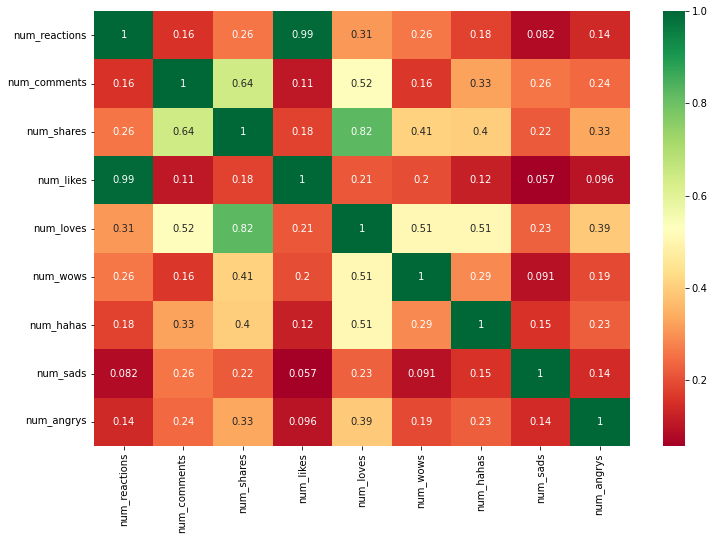

In [16]:
plt.figure(figsize=( 12 , 8 )) 
sns.heatmap(df.corr(), cmap = 'RdYlGn' , annot= True ) 
plt.show()

[Text(0.5, 0, 'Status Type'), Text(0, 0.5, 'Count')]

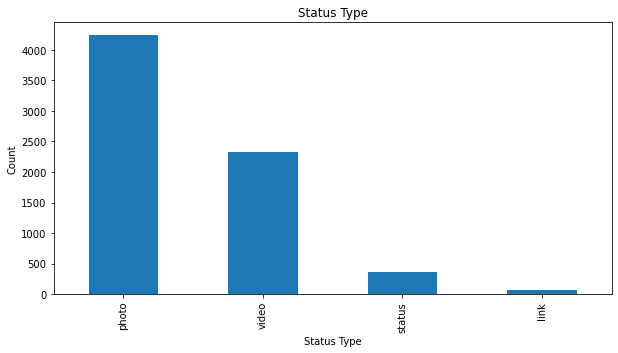

In [17]:
#Visualización de la variable clases de publicación
st_ax = df.status_type.value_counts().plot(kind='bar', figsize=(10,5), title='Status Type')
st_ax.set(xlabel='Status Type', ylabel='Count')

Se observa que la mayoría de las publicaciones se corresponde a Fotos y en segundo lugar videos. 

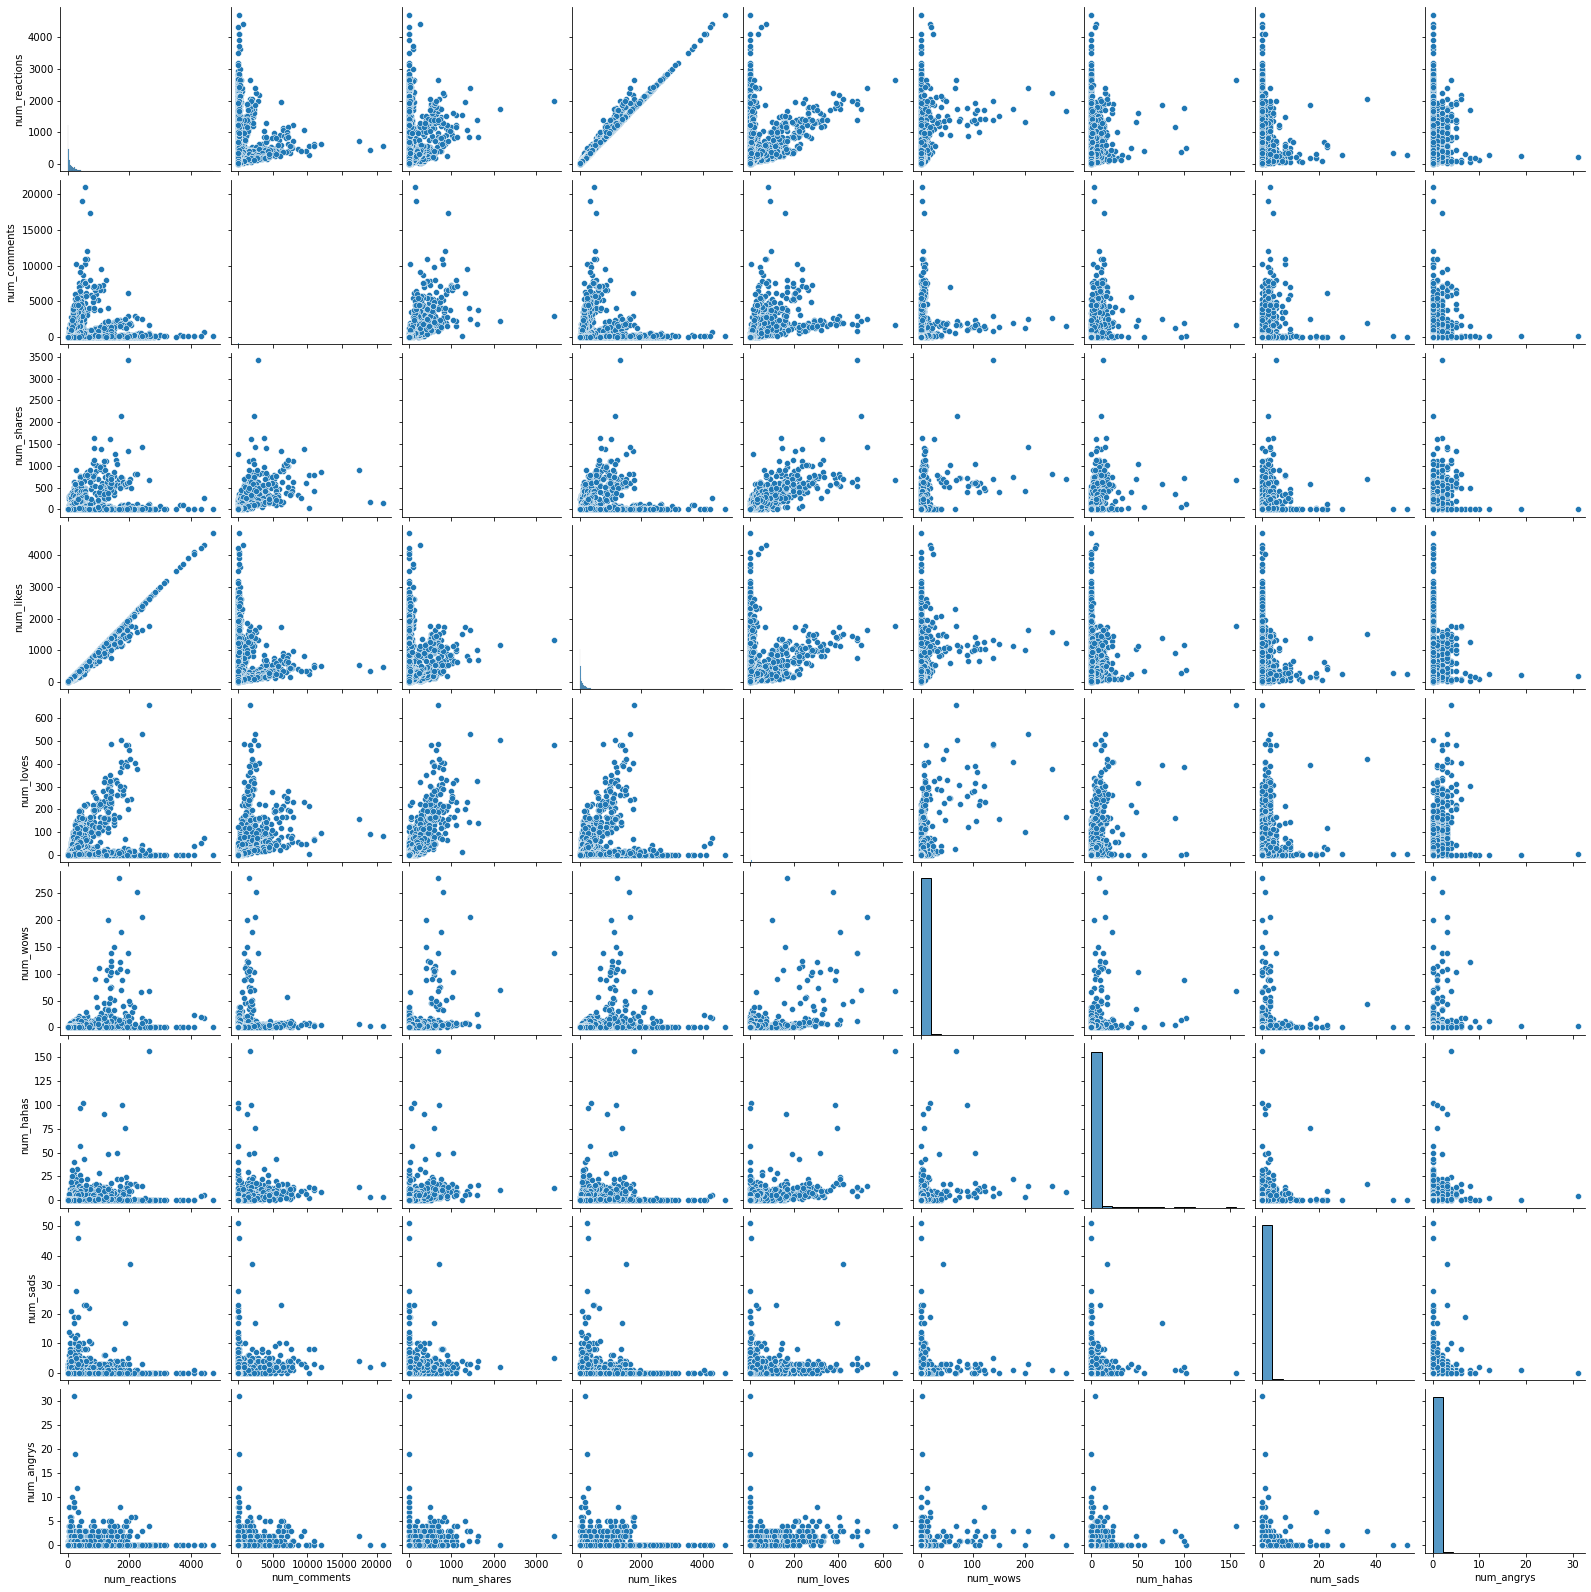

In [18]:
sns.pairplot(df, diag_kind="hist")

Se observa a través de los gráficos que ninguna variable numérica tiene distribución normal, y todas tienen outliers. 

#### Preprocesado

In [19]:
df.isnull().values.any()

False

In [20]:
df.isna().values.any()

False

No hay valores nulos ni datos anómalos.

##### Analizamos si las variables son normales o no aplicando Shapiro-Wilk Normality Test
+ α=0,05
+ H0: la muestra tiene una distribución gaussiana.
+ H1: la muestra no tiene distribución gaussiana.

In [21]:
#Seleccionamos las variables numéricas para realizarle el Test de hipótesis. 
num_df=df._get_numeric_data()
num_df.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,529,512,262,432,92,3,1,1,0
1,150,0,0,150,0,0,0,0,0
2,227,236,57,204,21,1,1,0,0
3,111,0,0,111,0,0,0,0,0
4,213,0,0,204,9,0,0,0,0


<Figure size 432x288 with 0 Axes>

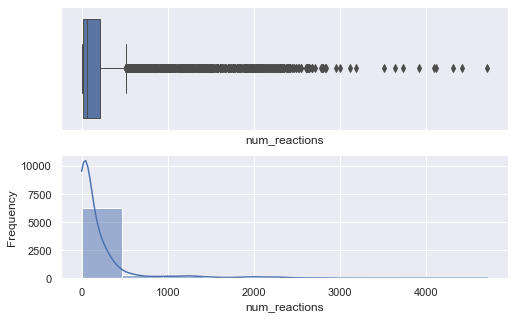

<Figure size 576x360 with 0 Axes>

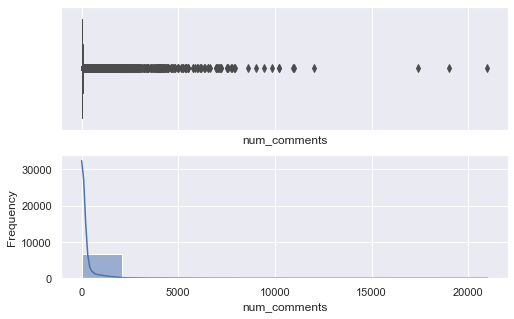

<Figure size 576x360 with 0 Axes>

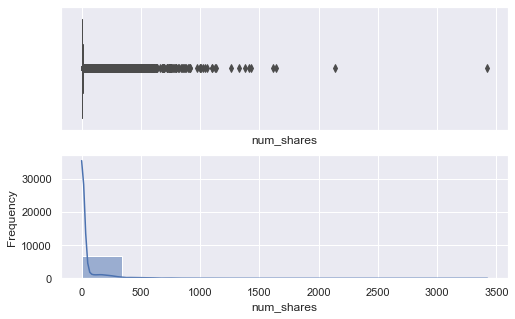

<Figure size 576x360 with 0 Axes>

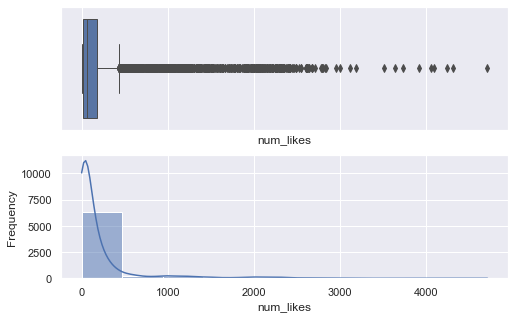

<Figure size 576x360 with 0 Axes>

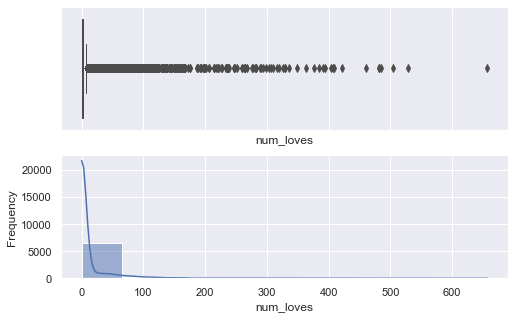

<Figure size 576x360 with 0 Axes>

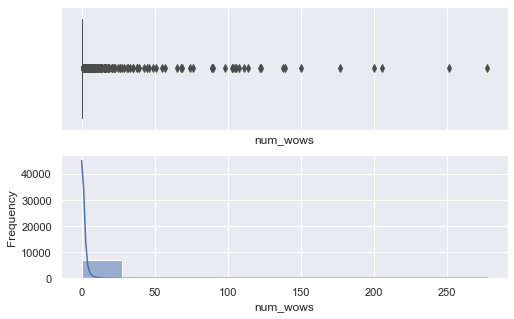

<Figure size 576x360 with 0 Axes>

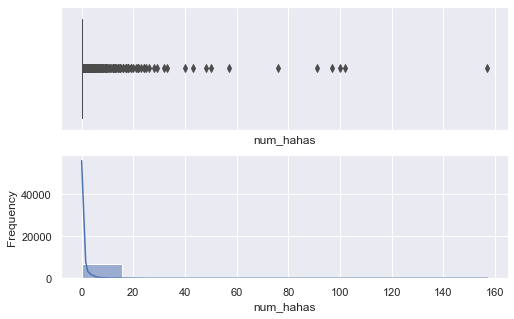

<Figure size 576x360 with 0 Axes>

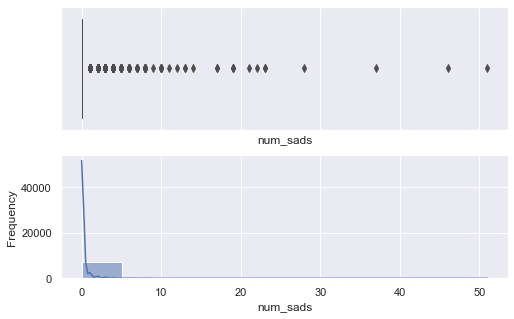

<Figure size 576x360 with 0 Axes>

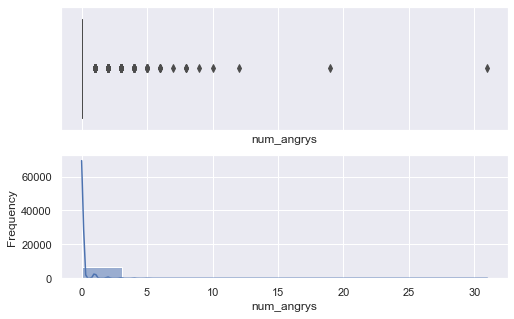

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

for i in num_df.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i],  ax=ax_box , linewidth= 1.0)
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True)

In [23]:
from scipy import stats

for i in num_df.columns:
    shapiro_test = stats.shapiro(num_df[i])
    print( i, 'tiene un p-value= ', shapiro_test.pvalue)
    if shapiro_test.pvalue>0.05:
        print('Se acepta la hipotesis nula, probablemente Gaussian.')
    else:
        print('Se rechaza la hipotesis nula, probablemente no Gaussiana.')

num_reactions tiene un p-value=  0.0
Se rechaza la hipotesis nula, probablemente no Gaussiana.
num_comments tiene un p-value=  0.0
Se rechaza la hipotesis nula, probablemente no Gaussiana.
num_shares tiene un p-value=  0.0
Se rechaza la hipotesis nula, probablemente no Gaussiana.
num_likes tiene un p-value=  0.0
Se rechaza la hipotesis nula, probablemente no Gaussiana.
num_loves tiene un p-value=  0.0
Se rechaza la hipotesis nula, probablemente no Gaussiana.
num_wows tiene un p-value=  0.0
Se rechaza la hipotesis nula, probablemente no Gaussiana.
num_hahas tiene un p-value=  0.0
Se rechaza la hipotesis nula, probablemente no Gaussiana.
num_sads tiene un p-value=  0.0
Se rechaza la hipotesis nula, probablemente no Gaussiana.
num_angrys tiene un p-value=  0.0
Se rechaza la hipotesis nula, probablemente no Gaussiana.


Se observa que las variables numéricas son probablemente no gaussianas, por lo que verificaremos si tienen outliers.

In [24]:
#Porcentaje  de  outliers en cada variable numercica
for k, v in num_df.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column num_reactions outliers = 9.83%
Column num_comments outliers = 19.55%
Column num_shares outliers = 20.21%
Column num_likes outliers = 10.76%
Column num_loves outliers = 18.62%
Column num_wows outliers = 100.00%
Column num_hahas outliers = 100.00%
Column num_sads outliers = 100.00%
Column num_angrys outliers = 100.00%


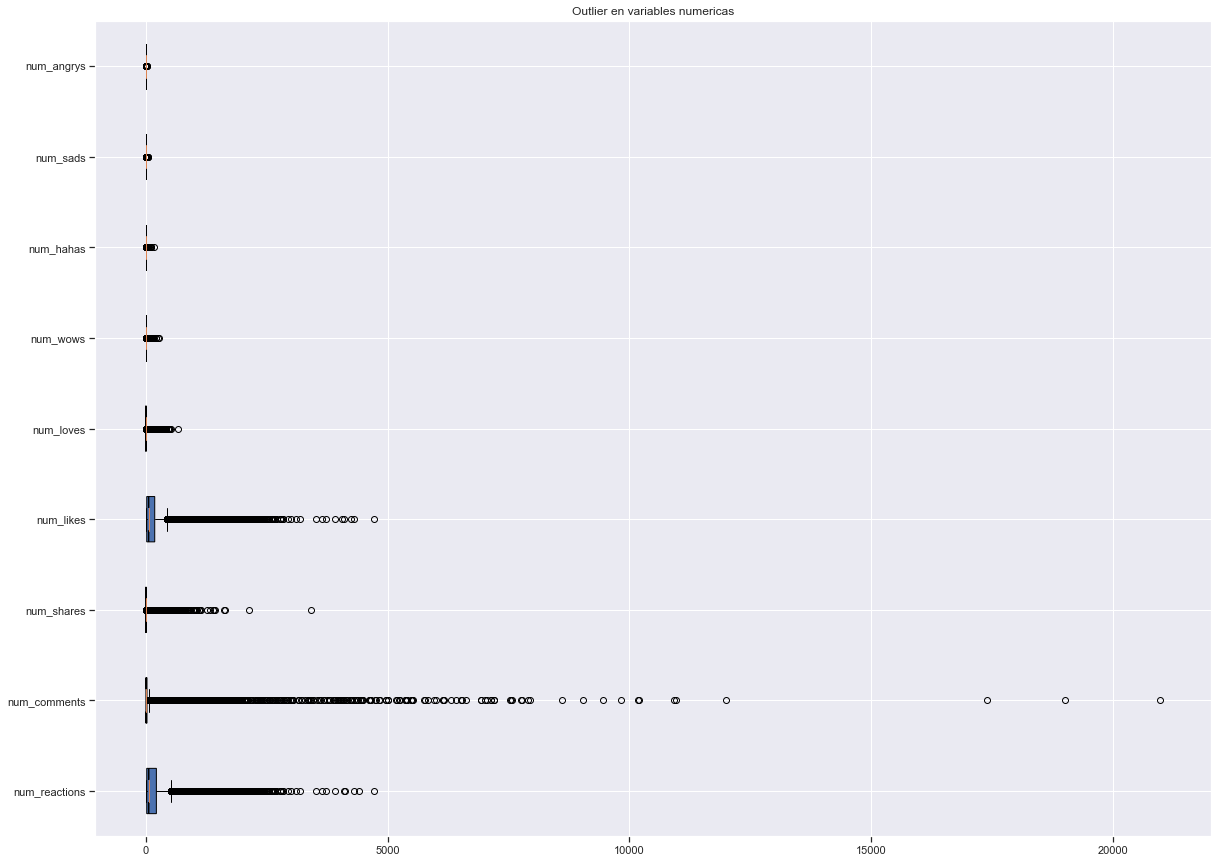

In [25]:
#Visualizamos las variables numericas y los outliers.

fig = plt.figure(figsize =(20, 15))
ax = fig.add_subplot(111)
 
bp = ax.boxplot(num_df, patch_artist = True,
                notch ='True', vert = 0)
ax.set_yticklabels(['num_reactions','num_comments','num_shares','num_likes',
                    'num_loves','num_wows','num_hahas','num_sads','num_angrys'])

plt.title("Outlier en variables numericas")
 
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
     
plt.show()

Se observa que todas las variables numéricas tienen outliers, algunas de ellas el 100%. Se les aplicará Robust. 


In [26]:
from sklearn.preprocessing import RobustScaler

columnsRobust = ['num_reactions','num_comments','num_shares','num_likes',
                    'num_loves','num_wows','num_hahas','num_sads','num_angrys']
scaler = preprocessing.RobustScaler().fit(df[columnsRobust])
df[columnsRobust] = scaler.transform(df[columnsRobust])
df.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,2.366834,23.090909,65.50,2.272727,30.666667,3.0,1.0,1.0,0.0
1,photo,0.462312,-0.181818,0.00,0.563636,0.000000,0.0,0.0,0.0,0.0
2,video,0.849246,10.545455,14.25,0.890909,7.000000,1.0,1.0,0.0,0.0
3,photo,0.266332,-0.181818,0.00,0.327273,0.000000,0.0,0.0,0.0,0.0
4,photo,0.778894,-0.181818,0.00,0.890909,3.000000,0.0,0.0,0.0,0.0


La variable categorica status_type se le aplicaremos Dummy. 

In [27]:
df = pd.get_dummies(df,  prefix= 'type', columns=['status_type'])

df.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,type_link,type_photo,type_status,type_video
0,2.366834,23.090909,65.50,2.272727,30.666667,3.0,1.0,1.0,0.0,0,0,0,1
1,0.462312,-0.181818,0.00,0.563636,0.000000,0.0,0.0,0.0,0.0,0,1,0,0
2,0.849246,10.545455,14.25,0.890909,7.000000,1.0,1.0,0.0,0.0,0,0,0,1
3,0.266332,-0.181818,0.00,0.327273,0.000000,0.0,0.0,0.0,0.0,0,1,0,0
4,0.778894,-0.181818,0.00,0.890909,3.000000,0.0,0.0,0.0,0.0,0,1,0,0


### PCA (Principal Component Analisis)
Es una técnica de análisis multivariado que se utiliza para reducir la dimensionalidad de un conjunto de datos al proyectarlos en un espacio de menor dimensión mientras se conserva la mayor cantidad posible de información.

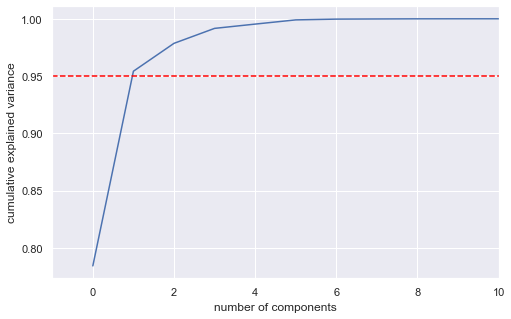

In [28]:
from sklearn.decomposition import PCA

pca = PCA().fit(df)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.axhline(0.95, color = "red", linestyle = "--")
plt.xlim([-1, 10])
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [29]:
pca = PCA(.95).fit(df)
print(pca.n_components_)

2


In [30]:
# Instancia el objeto PCA con el número de componentes deseados
pca = PCA(n_components=2)

# Ajusta el modelo PCA a los datos normalizados
pca.fit(df)

# Transforma los datos originales en los nuevos componentes PCA
df_pca = pd.DataFrame(pca.transform(df), columns=['Componente 1', 'Componente 2'], index=df.index)
df_pca.head()

,Componente 1,Componente 2
0,48.141874,39.281310
1,-14.880402,-2.243338
2,3.371810,3.440600
3,-14.884487,-2.249966
4,-14.274710,-1.396812


In [31]:
df.shape

(6997, 13)

### - Exercici 1
Descarrega el dataset adjunt, de registres de publicacions a Facebook sobre Tailàndia, i classifica els diferents registres utilitzant l'algorisme de K-means.

K-means es un algoritmo de clustering no supervisado que busca agrupar un conjunto de observaciones en K grupos (clusters) distintos.

El resultado de K-means se presenta en dos formas principales: la asignación de cada observación a un cluster y la ubicación de los centroides de cada cluster.

In [32]:
from sklearn.cluster import KMeans

# Crear un objeto KMeans 

kmeans = KMeans(
    init="random",
    n_init=10,
    max_iter=300,
    random_state=42
)
# Ajustar el modelo a los datos
kmeans.fit(df_pca)

# Obtener las etiquetas de los clusters
labels = kmeans.labels_

# Obtener los centros de los clusters
centers = kmeans.cluster_centers_
#Obtener el número de interacciones necesarias 
inter=kmeans.n_iter_

# Imprimir las etiquetas y los centros de los clusters
print("Etiquetas de los clusters: ", labels)
print("Centros de los clusters: ", centers)
print("Número de interacciones necesarias", inter)



Etiquetas de los clusters:  [3 2 6 ... 2 2 2]
Centros de los clusters:  [[ 404.47356454  110.71487439]
 [ 548.23919092 -280.37923391]
 [ -13.88580033   -1.99529858]
 [  47.13065089   25.66117029]
 [ 105.72382421   20.50833528]
 [ 170.17061395   93.21398543]
 [  21.00183525    1.75946367]
 [ 217.03973147  -72.79847862]]
Número de interacciones necesarias 33


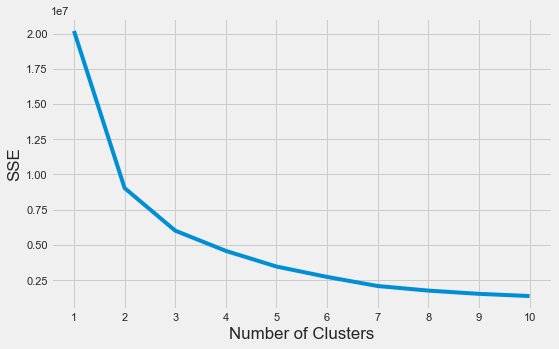

In [37]:
#Elección del número apropiado de clústeres 


sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_pca)
    sse.append(kmeans.inertia_)


plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Cuando se grafica SSE como una función de la cantidad de grupos, se observa que SSE continúa disminuyendo a medida que aumenta k. A medida que se agreguen más centroides, la distancia de cada punto a su centroide más cercano disminuirá. Hay un punto donde la curva SSE comienza a doblarse conocido como el punto del codo. Se cree que el valor x de este punto es una compensación razonable entre el error y el número de conglomerado.

In [38]:
from kneed import KneeLocator
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

3

In [39]:
#Instancio 
k_means = KMeans(n_clusters=3, random_state=42)
k_means.fit(df_pca)

KMeans(n_clusters=3, random_state=42)

In [40]:
#Predigo
y_pred = kmeans.predict(df_pca)
y_pred

array([7, 1, 9, ..., 1, 1, 1], dtype=int32)

In [41]:
df['Cluster'] = y_pred
df.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,type_link,type_photo,type_status,type_video,Cluster
0,2.366834,23.090909,65.50,2.272727,30.666667,3.0,1.0,1.0,0.0,0,0,0,1,7
1,0.462312,-0.181818,0.00,0.563636,0.000000,0.0,0.0,0.0,0.0,0,1,0,0,1
2,0.849246,10.545455,14.25,0.890909,7.000000,1.0,1.0,0.0,0.0,0,0,0,1,9
3,0.266332,-0.181818,0.00,0.327273,0.000000,0.0,0.0,0.0,0.0,0,1,0,0,1
4,0.778894,-0.181818,0.00,0.890909,3.000000,0.0,0.0,0.0,0.0,0,1,0,0,1


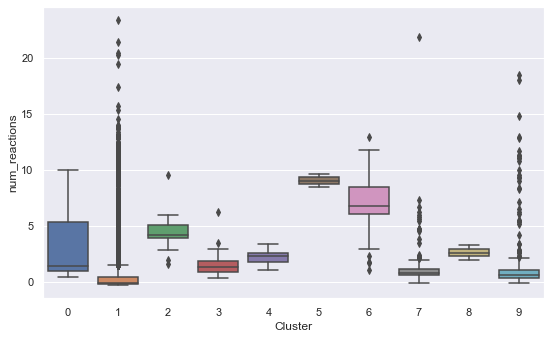

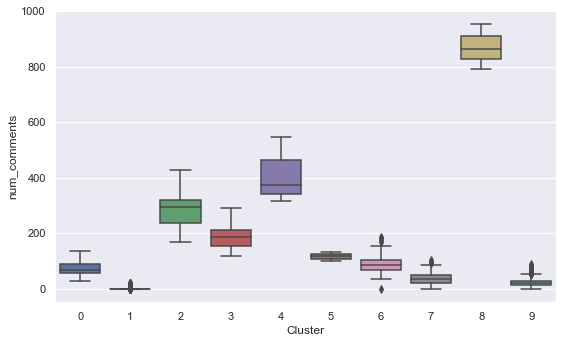

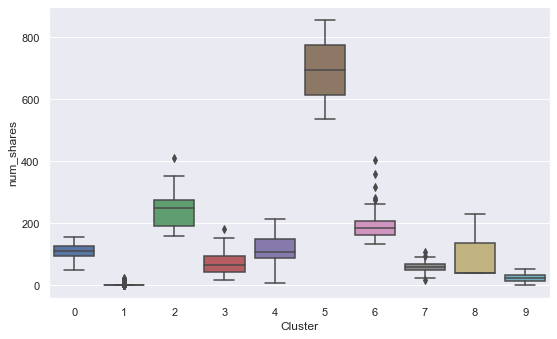

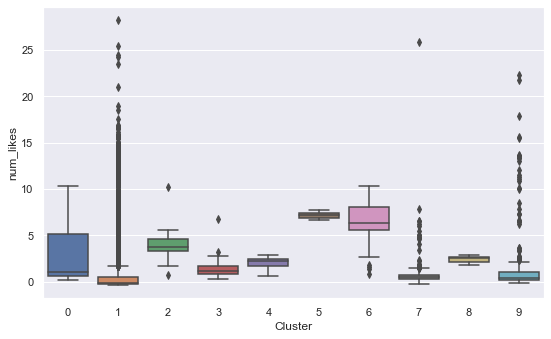

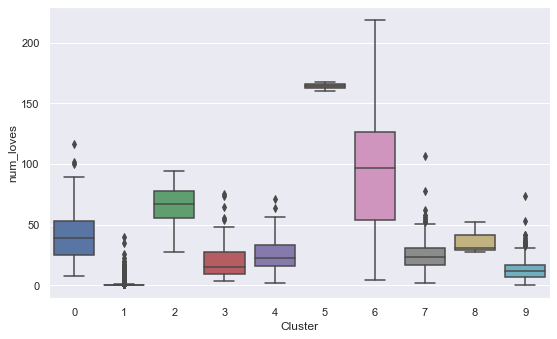

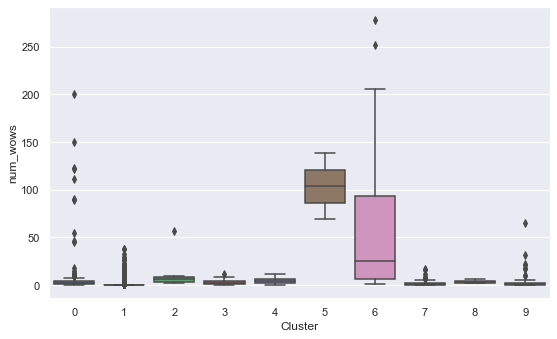

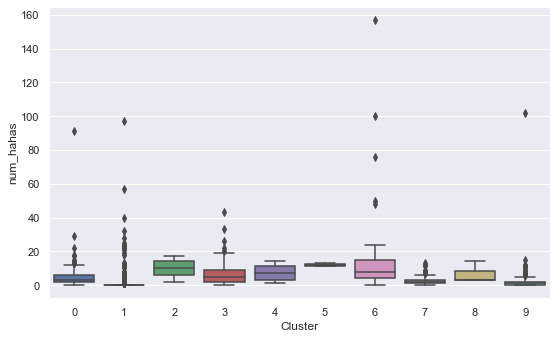

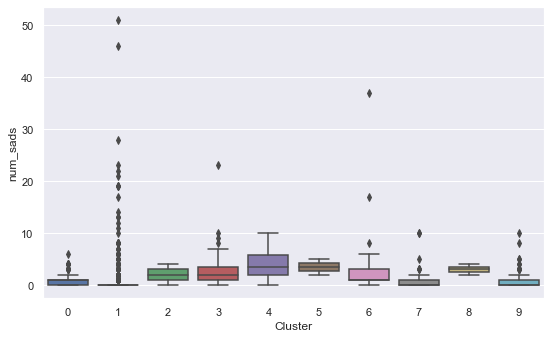

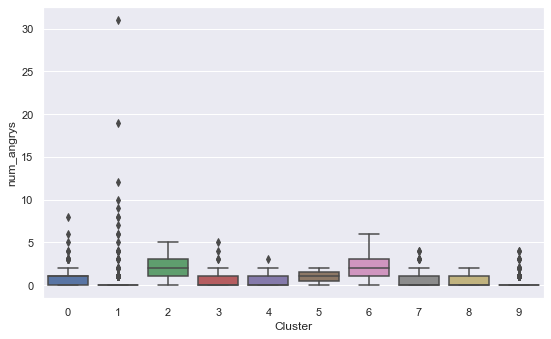

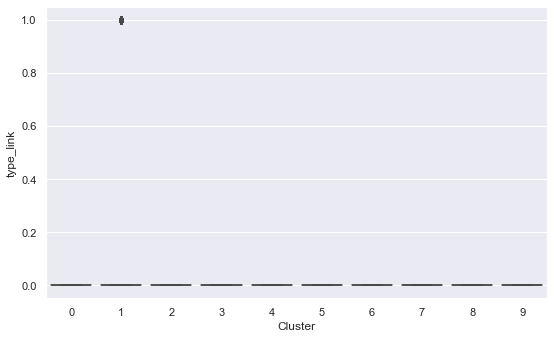

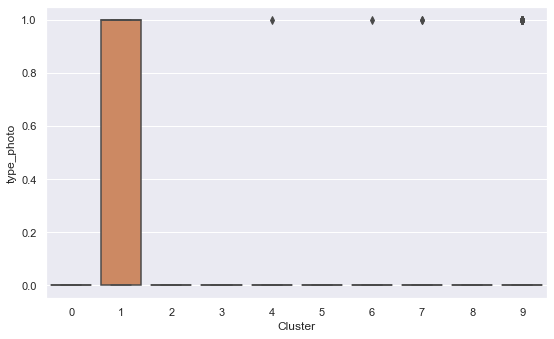

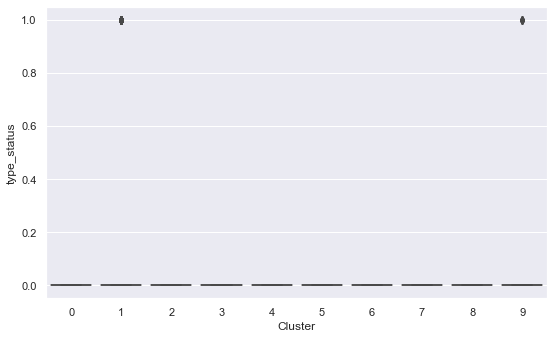

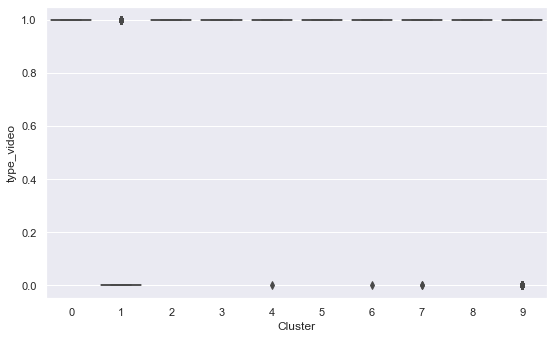

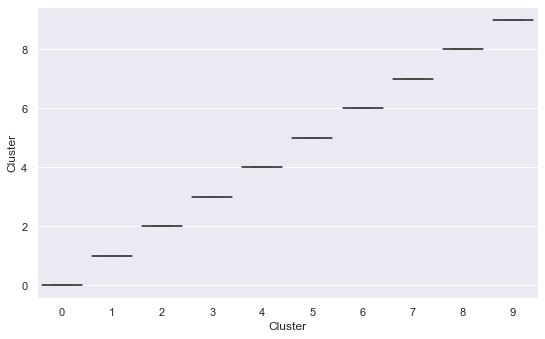

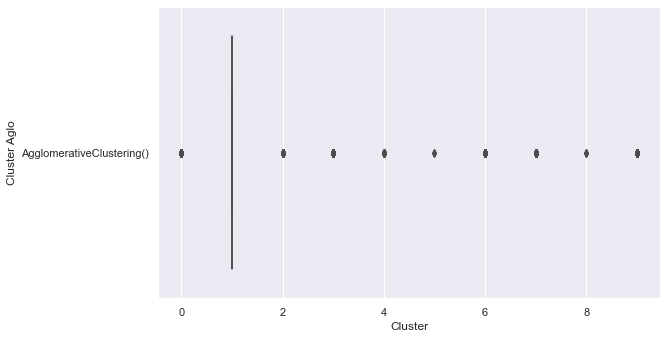

In [78]:
columns = df.columns

    
for i in columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(x='Cluster', y=i, data=df)

### - Exercici 2
Classifica els diferents registres utilitzant l'algorisme de clustering jeràrquic.

Los algoritmos de agrupamiento jerárquico agrupan objetos similares en grupos llamados clústeres .

In [68]:
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

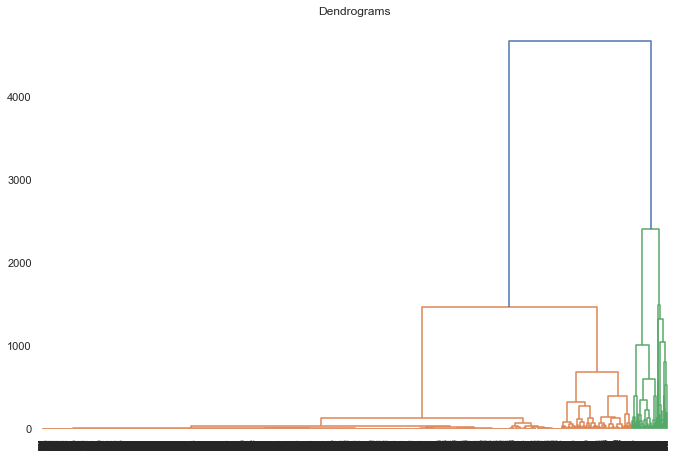

In [66]:
##Dendograma 
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(df_pca, method='ward'))

El eje x contiene las muestras y el eje y representa la distancia entre estas muestras. La línea vertical con distancia máxima es la línea azul y por lo tanto podemos decidir un umbral de 3000 y cortar el dendrograma.

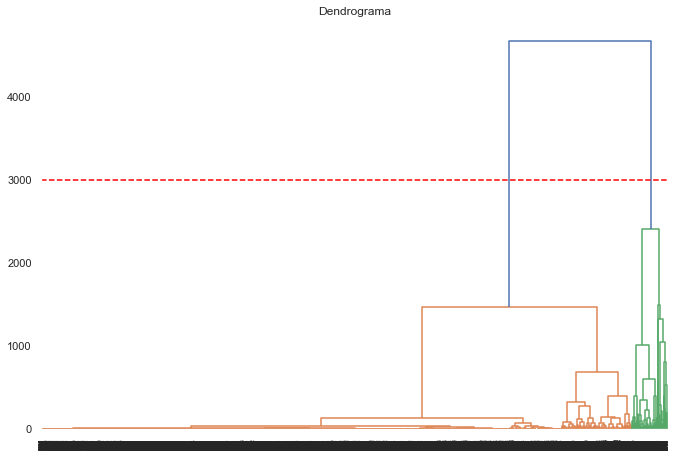

In [53]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograma")  
dendro = shc.dendrogram(shc.linkage(df_pca, method='ward'))
plt.axhline(y=3000, color='red', linestyle='--')

Tenemos dos grupos ya que la línea divide el Demograma en dos puntos.

In [74]:
from sklearn.cluster import AgglomerativeClustering

#Aplicamos el agrupamiento jerárquico para 2 clústeres

aglo_cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
aglo_cluster.fit_predict(df_pca)

array([1, 1, 1, ..., 1, 1, 1])

Podemos ver los valores de 0 y 1 en la salida ya que definimos 2 clústeres. 0 representa los puntos que pertenecen al primer grupo y 1 representa los puntos del segundo grupo. 

In [75]:
df['Cluster Aglo']= aglo_cluster
df.head()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,type_link,type_photo,type_status,type_video,Cluster,Cluster Aglo
0,2.366834,23.090909,65.50,2.272727,30.666667,3.0,1.0,1.0,0.0,0,0,0,1,7,AgglomerativeClustering()
1,0.462312,-0.181818,0.00,0.563636,0.000000,0.0,0.0,0.0,0.0,0,1,0,0,1,AgglomerativeClustering()
2,0.849246,10.545455,14.25,0.890909,7.000000,1.0,1.0,0.0,0.0,0,0,0,1,9,AgglomerativeClustering()
3,0.266332,-0.181818,0.00,0.327273,0.000000,0.0,0.0,0.0,0.0,0,1,0,0,1,AgglomerativeClustering()
4,0.778894,-0.181818,0.00,0.890909,3.000000,0.0,0.0,0.0,0.0,0,1,0,0,1,AgglomerativeClustering()


### - Exercici 3
Calcula el rendiment del clustering mitjançant un paràmetre com pot ser silhouette.

Silhouette devuelve el coeficiente de silueta medio de todas las muestras.

0.9022585143481457
0.8764644906755046
0.8667141785793367
0.8723465162456786
0.8717142947670097
0.8730478175696355
0.8665082610984627
0.8668799490950201
0.8678711487947507


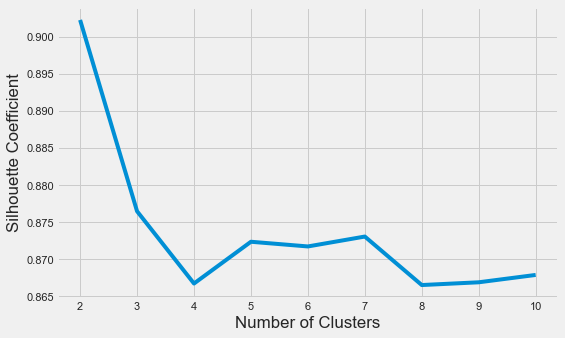

In [111]:
from sklearn.metrics import silhouette_score

silhouette_coefficients = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_pca)
    score = silhouette_score(df_pca, kmeans.labels_,metric='euclidean')
    silhouette_coefficients.append(score)
    print(score)
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

0.8931824193776106
0.8764536860820032
0.8774572198171012
0.8305542185641651
0.8320252976829787
0.8318950520893845
0.833368481715583
0.8343598023576849
0.8288539214442315


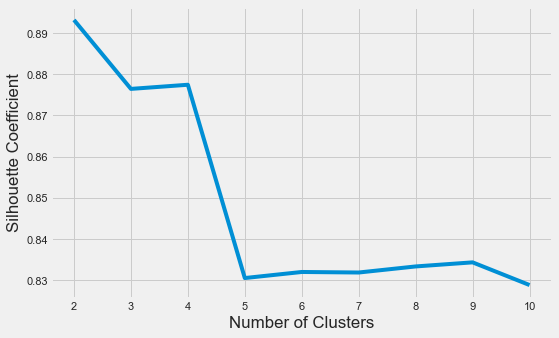

In [110]:
silhouette_coefficients_ac = []

for k in range(2, 11):
    aglo_cluster = (AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')) 
    aglo_cluster.fit_predict(df_pca)
    score_ac = silhouette_score(df_pca, aglo_cluster.labels_,metric='euclidean')
    print(score_ac)
    silhouette_coefficients_ac.append(score_ac)
    

plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients_ac)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

Silhouette score es una métrica utilizada para evaluar la calidad de un algoritmo de agrupación. La Silhouette mide qué tan similar es un objeto a su propio grupo en comparación con otros grupos. Va de -1 a 1, donde una puntuación más cercana a 1 indica que el objeto está bien emparejado con su propio grupo y mal emparejado con los grupos vecinos, mientras que una puntuación más cercana a -1 indica lo contrario. Una puntuación cercana a 0 indica que el objeto está cerca del límite entre los grupos y podría pertenecer potencialmente a cualquiera de ellos.

Al interpretar un gráfico de Silhouette, normalmente busca el puntaje de silueta promedio más alto en todos los grupos. Una puntuación media más alta indica que los grupos están bien separados y que los objetos dentro de ellos son muy similares. Por otro lado, un puntaje promedio más bajo indica que los grupos se superponen y los objetos dentro de ellos son menos similares.

En el gráfico de Silhouette, cada grupo está representado por una barra vertical cuya altura representa la puntuación de silueta promedio de los objetos dentro del grupo. El ancho de la barra representa el número de objetos en el grupo. La puntuación general de la silueta está representada por una línea vertical punteada y su posición en el eje x indica la puntuación. El gráfico de puntuación de silueta puede ayudarlo a elegir la cantidad óptima de grupos para sus datos. Debe elegir la cantidad de grupos que maximiza el puntaje de silueta general y, al mismo tiempo, asegurarse de que cada grupo tenga un Silhouette promedio alto.